<a href="https://colab.research.google.com/github/wayanpdw/Clustering-Customer-Segmentation/blob/main/Mall_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering**
I Wayan Pasek Dian Wahyudi | DS0114 | Telkom DTI 2020


# Pendahuluan
Analisis *cluster* atau *clustering* adalah sebuah proses mengkategorikan data ke dalam beberapa kelompok/ *cluster* sehingga anggota kelompok dalam satu *cluster* memiliki nilai kemiripan lebih tinggi daripada kelompok lain.

Umumnya proses *clustering* dibagi menjadi dua metode yaitu:


1.   Hierarchial *Clustering* (Teknik *clustering* berdasarkan hirarki, dimana terdapat penggabungan dua grup yang terdekat)
2.   Particial *Clustering* (Pengelompokan data dengan metode penetapan titik pusat/ centroid dan meminimumkan jarak kemiripan dari seluruh data ke centroidnya masing-masing)

Terdapat Tiga jenis metode patitional *clustering* yang populer, yaitu: K-Means, Fuzzy C-means, dan QT *clustering*.




# Pemodelan Algoritma Clustering

Pada proyek kali ini kita akan memodelkan metode *clustering* berdasarkan data pendapatan dan pengeluaran dari pelanggan pada suatu mall. Model ini nantinya akan digunakan untuk membuat sebuah segmentasi pelanggan, sehingga dalam pemanfaatannya diharapkan model ini dapat digunakan sebagai insight dalam strategi pemasaran yang optimal.

Data pelanggan yang akan digunakan bersumber dari https://raw.githubusercontent.com/wayanpdw/Clustering-Customer-Segmentation/main/Mall_Customers.csv

Langkah-langkah dalam membuat model *clustering* akan dijabarkan secara runut dibawah.

#**Menyiapkan Data**


Mengimpor *Libraries*


In [128]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')

Mengimpor data mentah dengan *library* pandas



In [129]:
df_data = pd.read_csv ('https://raw.githubusercontent.com/wayanpdw/Clustering-Customer-Segmentation/main/Mall_Customers.csv')
df_data

# Memunculkan 5 data pertama dalam sebuah dataframe baru (opsional)
df_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [130]:
# Menampilkan 5 data terakhir
df_data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


Menampilkan informasi dari dataset pelanggan.

# **Data Preprocessing**

Pada tahap ini akan diproses data yang sudah di impor sebelumnya.

In [131]:
df_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


Menampilkan data customer skaligus mengecek tipe data yang terdapat dalam dataset.

In [132]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Bisa dilihat dataset customer terdiri dari data yang bertipe **integer** dan bertipe **object**. Selanjutnya kita perlu memeriksa apakah ada data yang kosong atau bernilai NULL.

In [133]:
df_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Tidak ada adta yang kosong atau bernilai NULL.

In [134]:
feature = df_data.copy()
feature = df_data.drop(['CustomerID'], axis=1)
df_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#**Visualisasi Distribusi Data**

 

Setelah data diproses selanjutnya data dapat ditampilkan visualisasinya untuk melihat distribusi data.

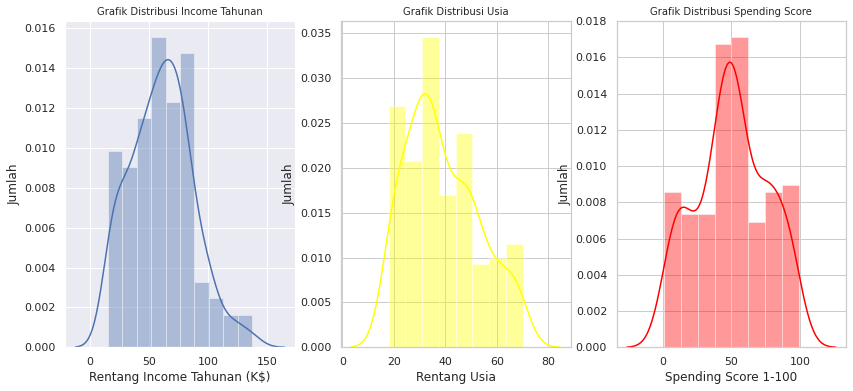

In [135]:
# Distribusi data customer berdasarkan pendapatan per tahun, usia, dan spending score

plt.rcParams['figure.figsize']=(14,6)

plt.subplot(1, 3, 1)
sns.set(style= 'whitegrid')
sns.distplot(df_data['Annual Income (k$)'])
plt.title('Grafik Distribusi Income Tahunan', fontsize=10)
plt.xlabel('Rentang Income Tahunan (K$)')
plt.ylabel('Jumlah')

plt.subplot(1, 3, 2)
sns.set(style= 'whitegrid')
sns.distplot(df_data['Age'], color='yellow')
plt.title('Grafik Distribusi Usia', fontsize=10)
plt.xlabel('Rentang Usia')
plt.ylabel('Jumlah')

plt.subplot(1, 3, 3)
sns.set(style= 'whitegrid')
sns.distplot(df_data['Spending Score (1-100)'], color='red')
plt.title('Grafik Distribusi Spending Score', fontsize=10)
plt.xlabel('Spending Score 1-100')
plt.ylabel('Jumlah')

plt.show()

Dari Grafik diatas dapat kita amati pola distribusi/persebaran dari income tahunan dan usia customer. Kita bisa lihat bahwa hanya ada sedikit customer yang mempunyai income lebih dari 100 ribu USD. Sementara sebagian besar dari mereka mempunyai pendapatan berkisar antara 50-75 ribu USD.

Dari grafik diatas pula kita bisa simpulkan bahwa pelanggan yang paling lumrah berada di kawasan mall mempunyai kisaran usia 30-35 tahun. 

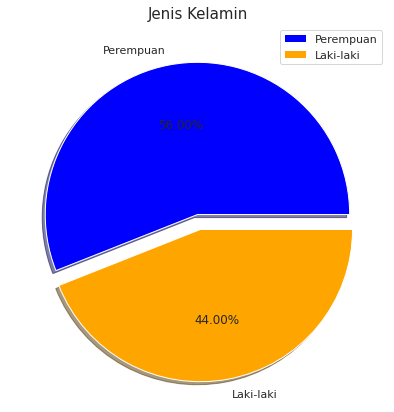

In [136]:
# Pembagian data customer berdasarkan jenis kelamin
labels = ['Perempuan', 'Laki-laki']
size = df_data['Gender'].value_counts()
colors = ['blue', 'orange']
explode = [0, 0.1]

# Pie chart
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Jenis Kelamin', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

Dengan melihat Pie Chart diatas yang menjelaskan tentang distribusi jenis Kelamin di Mall, perempuan mendominasi dengan prosentase 56% sedangkan laki-laki 44%. 

Ini menunjukan kesenjangan yang besar terutama ketika populasi laki-laki secara umum relatif lebih tinggi daripada perempuan.

**Korelasi Data Fitur**

Setelah data selesai divisualisasi, selanjutnya kita akan elihat korelasi antar fiturnya.

Text(0.5, 1.0, 'Korelasi Semua Fitur')

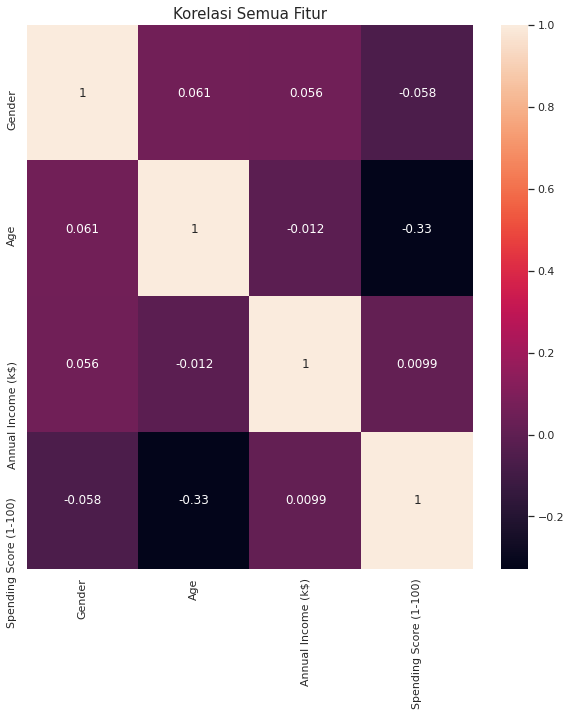

In [137]:
# Melihat korelasi fitur dengan heatmap
feature = df_data.copy()
feature = df_data.drop(['CustomerID'], axis=1)
df_data.head()

feature['Gender'] = feature['Gender'].replace(['Male','Female'],[1,0])
correlation = feature.corr()
f , ax = plt.subplots(figsize = (10,10))
sns.heatmap(feature.corr(), annot=True).set_title('Korelasi Semua Fitur', size='15')

Grafik di atas menampilkan korelasi antara semua fitur dari kumpulan data customer, diagram heatmap ini mencerminkan fitur yang paling berkorelasi dengan warna oranye dan fitur yang paling sedikit berkorelasi dengan warna kuning.

Kami dapat melihat dengan jelas bahwa atribut ini tidak memiliki korelasi yang baik di antara mereka, oleh karena itu perlu dilanjutkan pencarian fitur yang memmiliki nilai korelasi yang paling tinggi.

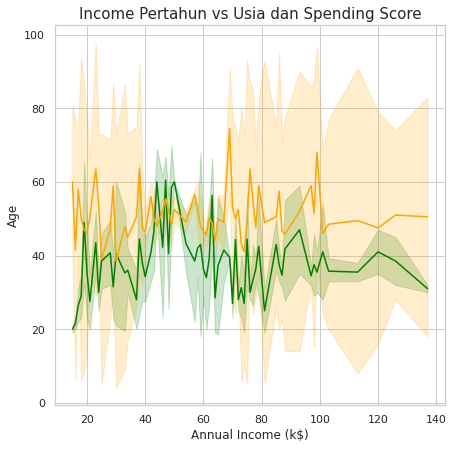

In [138]:
x = df_data['Annual Income (k$)']
y = df_data['Age']
z = df_data['Spending Score (1-100)']

sns.lineplot(x, y, color = 'green')
sns.lineplot(x, z, color = 'orange')
plt.title('Income Pertahun vs Usia dan Spending Score', fontsize = 15)
plt.show()


Titik antara income tahunan dan usia di atas digambarkan dengan garis warna hijau, dan plot antara income tahunan dan spending score digambarkan dengan garis warna oranye. 

Grafik diatas menunjukkan bagaimana korealasi fitur usia dan pengeluaran bervariasi dengan income pertahun.

**Menentukan fitur untuk algoritma clustering.**

Tidak semua fitur akan dimasukan ke dalam algoritma clustering, kali ini kita hanya menggunakan fitur pendapatan per tahun dan spending score.

Pertama-tama kita harus definisikan dulu fitur ke dalam variabel baru.

In [143]:
f = feature[['Annual Income (k$)', 'Spending Score (1-100)']]
f.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


#**Scaling Data**

Pada tahap ini perlu dilakukan scaling data atau standarisasi data untuk menyamakan rentang dan / atau variabilitas data. Standarisasi fitur menjadikan nilai dari setiap fitur dalam data memiliki mean nol (saat mengurangkan mean di pembilang) dan unit-variance.

In [140]:
# Melakukan penamaan untuk StandardScaler sebagai scaler
scaler = StandardScaler() 

# Fit Standardization
column_names = f.columns.tolist()
f[column_names] = scaler.fit_transform(f[column_names])
f.sort_index(inplace=True)
f

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


#**Visualisasi Model**

Tahap kali ini kita siap melakukan pemodelan terhadap data yang sudah kita punya.

Text(0, 0.5, 'Spending Score')

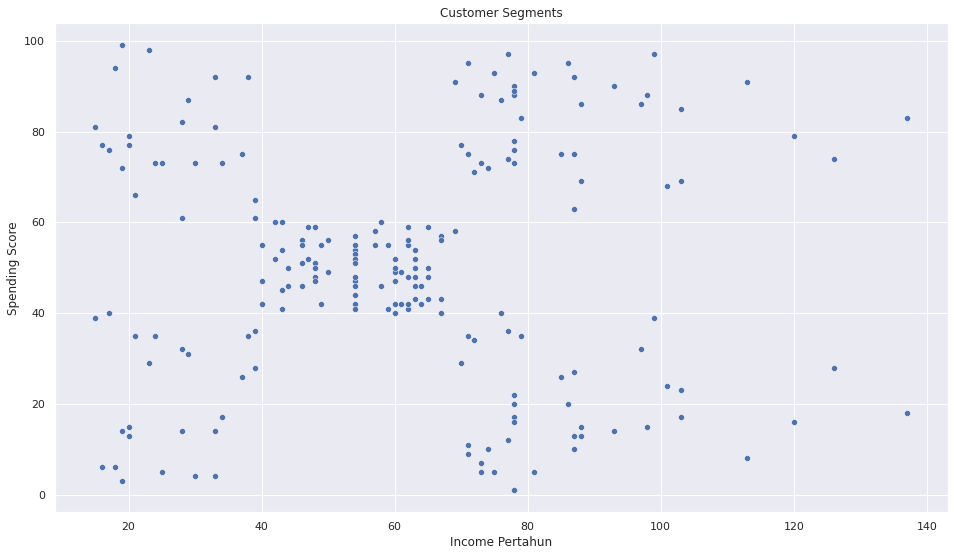

In [144]:
# Menentukan plot
sns.set() 
plt.rcParams['figure.figsize'] = (16, 9)

# Visualisasi data
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data= f)
plt.title('Customer Segments')
plt.xlabel('Income Pertahun')
plt.ylabel('Spending Score')

# **K-Means Clustering Models**

K-Mean clustering adalah salah satu “unsupervised machine learning algorithms” yang paling sederhana dan populer .Tujuan dari algoritma ini adalah untuk menemukan grup dalam data, dengan jumlah grup yang diwakili oleh variabel K. Variabel K sendiri adalah jumlah cluster yang kita inginkan.

**Menentukan nilai K**

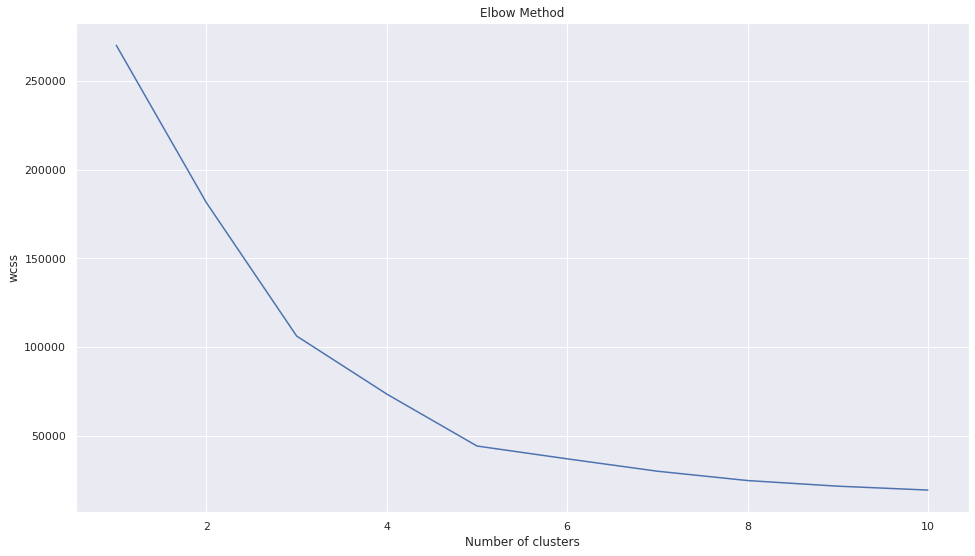

In [145]:
# Mengubah data frame menjadi numpy array
nump = f.to_numpy()
nump

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(nump)
    wcss.append(kmeans.inertia_)
  
# Visualisasi 
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [146]:
# Silhoutte method
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(nump)
    label = kmeans.labels_
    sil_coeff = silhouette_score(nump, label, metric='euclidean')
    print('For n_clusters={}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.2846326569755346
For n_clusters=3, The Silhouette Coefficient is 0.46761358158775435
For n_clusters=4, The Silhouette Coefficient is 0.4931963109249047
For n_clusters=5, The Silhouette Coefficient is 0.553931997444648
For n_clusters=6, The Silhouette Coefficient is 0.5393922132561455
For n_clusters=7, The Silhouette Coefficient is 0.5288104473798049
For n_clusters=8, The Silhouette Coefficient is 0.459295844567539
For n_clusters=9, The Silhouette Coefficient is 0.457462901394195
For n_clusters=10, The Silhouette Coefficient is 0.44096594426188596


Dari haril elbow method dan silhouette method diatas maka nilai K yang terbaik adalah 5, jadi K=5.

**Memodelkan K-Means Clustering**

Nilai K yang sudah didapat akan kita jadikan acuan berapa centroid yang akan kita gunakan pada model kali ini.

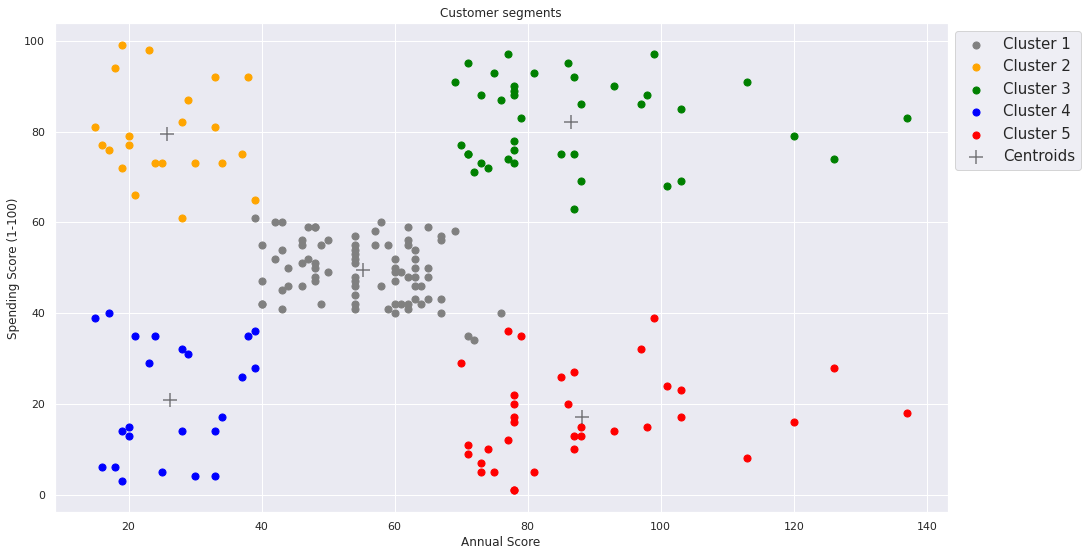

In [164]:
# Aplikasikan K-Means ke dalam data
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster = kmeans.fit_predict(nump)

# Visualisasi cluster untuk K=5
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data= f)
plt.scatter(nump[cluster == 0, 0], nump[cluster == 0, 1], s = 50, label = 'Cluster 1', c= 'grey')
plt.scatter(nump[cluster == 1, 0], nump[cluster == 1, 1], s = 50, label = 'Cluster 2', c= 'orange')
plt.scatter(nump[cluster == 2, 0], nump[cluster == 2, 1], s = 50, label = 'Cluster 3', c= 'green')
plt.scatter(nump[cluster == 3, 0], nump[cluster == 3, 1], s = 50, label = 'Cluster 4', c= 'blue')
plt.scatter(nump[cluster == 4, 0], nump[cluster == 4, 1], s = 50, label = 'Cluster 5', c= 'red')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,marker='+', alpha=0.5, label='Centroids', c= 'black')
plt.title('Customer segments')
plt.xlabel('Annual Score')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=15)

plt.show()